In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import mpl_toolkits.mplot3d
import itertools
import seaborn as sns
sns.set()
# %config InlineBackend.figure_format = 'svg'

In [2]:
training_data = np.array([
  [1, 0.9],
  [2, 2.3],
  [3, 3.2],
  [4, 4.8],
])

training_domain = np.arange(0, 100, 2)
training_data = np.column_stack((training_domain, np.random.normal(-1.0, 1.0, 50) + training_domain))

In [3]:
def cost(hypothesis, data):
  predicted = hypothesis(data[:, 0])
  actual = data[:, 1]
  return np.sum(np.square(actual - predicted)) / (2 * len(data))

In [4]:
def gradient_descent(data, alpha=.0001, iter=False):
  # todo: make rand
  theta_one = -5.0
  theta_zero = -20.0
  while True:
    if iter:
      yield [theta_one, theta_zero]
    hypothesis = np.vectorize(lambda x: x*theta_one + theta_zero)
    derivative_theta_zero = np.sum(hypothesis(data[:, 0]) - data[:, 1]) / len(data)
    derivative_theta_one = np.sum((hypothesis(data[:, 0]) - data[:, 1]) * data[:, 0]) / len(data)
    if abs(derivative_theta_one) < 0.001 and abs(derivative_theta_zero) < 0.001:
      break
    theta_one = theta_one - alpha * derivative_theta_one
    theta_zero = theta_zero - alpha * derivative_theta_zero
  yield [theta_one, theta_zero]


/home/kuba/.local/share/virtualenvs/ml-v1Eh_BTo/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


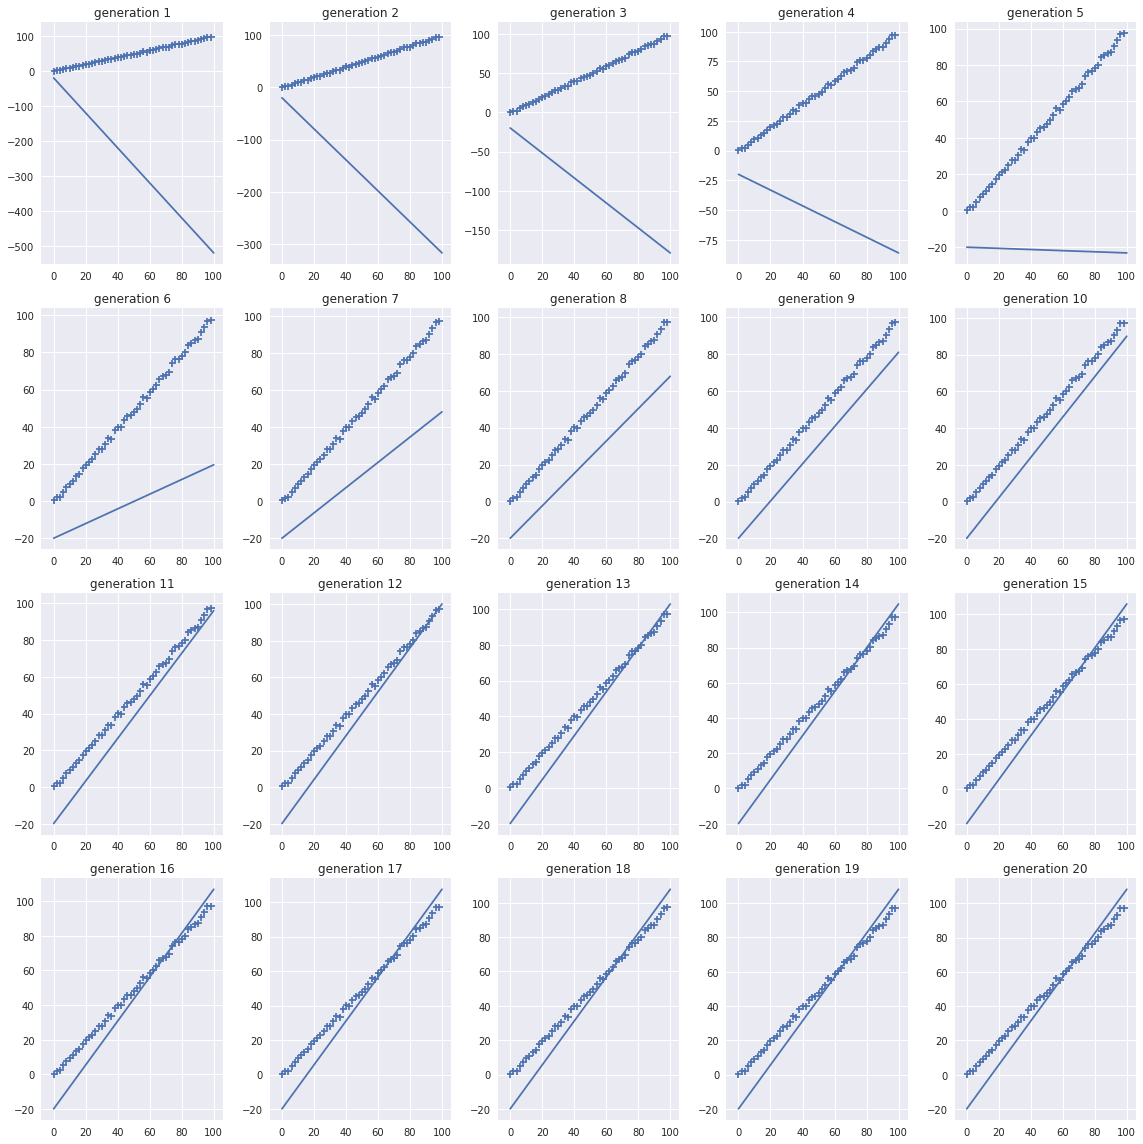

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))
for (ax, [theta_one, theta_zero], generation) in zip(axes.flatten().tolist(), gradient_descent(training_data, iter=True), itertools.count(1)):
  ax.plot(np.linspace(0, 100), np.linspace(0, 100) * theta_one + theta_zero)
  ax.scatter(training_data[:, 0], training_data[:, 1], marker='+')
  ax.set_title("generation {}".format(generation))
fig.set_tight_layout(True)
plt.show()

In [27]:
theta_one, theta_zero = next(gradient_descent(training_data))
print("gradient descent result", theta_one, theta_zero)
hypo = np.vectorize(lambda x: x * theta_one + theta_zero)
print("cost is", cost(hypo, training_data))


gradient descent result 0.9960119480634998 -0.8043406083732236
cost is 0.41897357140540065


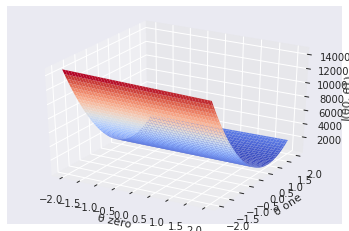

In [36]:
# 3d surface visualization of the cost function
fig = plt.figure()
samples = 100
space = np.linspace(-2, 2, num=samples)
thetas = np.column_stack((np.tile(space, samples), np.repeat(space, samples)))
hypos = np.apply_along_axis(lambda theta: np.vectorize(lambda x: x*theta[1] + theta[0]), axis=1, arr=thetas)
costs = np.vectorize(lambda hypo: cost(hypo, training_data))(hypos)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(thetas[:, 0].reshape(samples, samples), thetas[:, 1].reshape(samples, samples), costs.reshape(samples, samples), cmap='coolwarm', shade=False)
ax.set_xlabel("θ zero")
ax.set_ylabel("θ one")
ax.set_zlabel("J(θ0, θ1)")
plt.show()

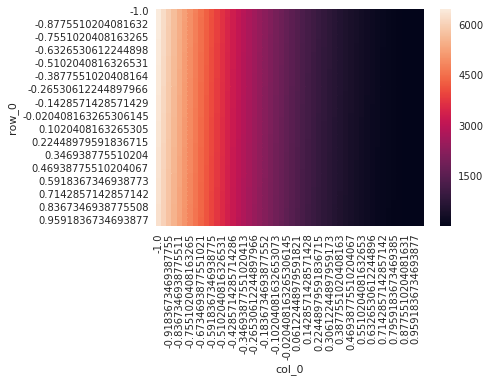

In [28]:
samples = 50
space = np.linspace(-1, 1, num=samples)
df = pd.crosstab(space, space)
df = df.apply(lambda x: x.index.map(lambda index: cost(np.vectorize(lambda y: y*index + x.name), training_data)), axis=1)
sns.heatmap(df)